# Understanding RNN

- A major characteristic of all neural networks for the likes of densely connected networks and convnets, is that they have **no memory**.
- Each input shown to them is processed independently, with no state kept in between inputs.
- For the likes of such network, in order to process a sequence or temporal series of data points, we have to show the entire sequence to the network at once.
- Turn it into a **single data point**.
- Follow **feedforward networks.**

### What does RNN does?

- It processes sequences by iterating through the sequence elements and maintaining a *state* containing information relative to what it has seen so far.
- It is a type of Neural Network having internal loop
- Its state is reset between processing two different, independent  sequences, so we will consider one sequence a single data point.

#### Let's take look at Pseudocode RNN

In [ ]:
state_t = 0                                   # The state at t
for input_t in input_sequences:               # Iterates over sequences
    output_t = f(input_t, state_t)
    state_t = output_t                        # THe previous output becomes the sate for the next iteration
    
    

######## More detailed overlook

state_t = 0
for input_t in input_sequences:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

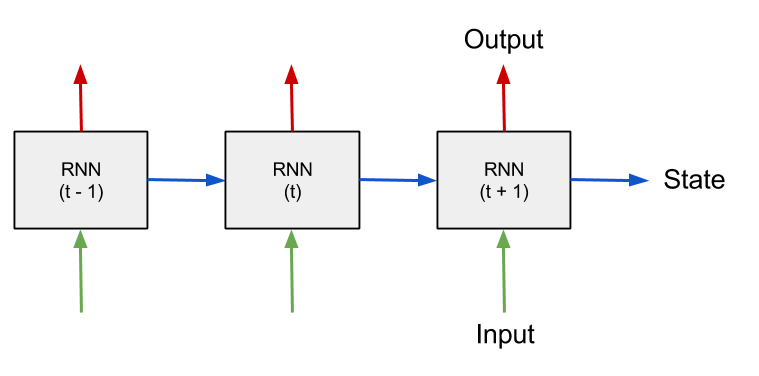

### Numpy Implementation of a simple RNN

In [2]:
import numpy as np

timesteps = 100                                                       # Number of timesteps in the input sequence
input_features = 32                                                   # Dimenisonality of the input feature space
output_features = 64                                                  # Dimensionality of output feature space

inputs = np.random.random((timesteps, input_features))                # Input data: random noise for the sake of the example

state_t = np.zeros((output_features,))                                # Initial state: an all-zero vector

W = np.random.random((output_features, input_features))               # Create random weight matrices(W, U, b)
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:                                                # Input_t is a vector of shape(Input_features)
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)   # Combines the input with the current state(the previous output) to obtain the current output
    successive_outputs.append(output_t)                               # Stores the output in a list
    state_t = output_t                                                # Update the state of the network for the next timestamp
final_output_sequence = np.concatenate(successive_outputs, axis=0)    # The final output is a 2D tensor of shape(timesteps, output_features)


**In nutshell, an RNN is a for loop that reuses quantities computed during the previous iteration of the loop, nothing more**

### A recurrent layer in Keras

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


This returns the full state sequence

In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Somehow, it is useful to stack several recurrent layers one after the other in order to increase the representational power of a network.

In [9]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))                             # Last layer only returns the last output
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 32)                2080      
Total params: 330,400
Trainable params: 330,400
Non-trainable params: 0
________________________________________________

### Using the IMDB data

In [10]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading Data..........')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading Data..........
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training the model with Embedding and SimpleRNN

In [12]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.3)


Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 16s 900us/step - loss: 0.6583 - acc: 0.5937 - val_loss: 0.7420 - val_acc: 0.5535
Epoch 2/10
17500/17500 [==============================] - 14s 823us/step - loss: 0.4355 - acc: 0.8150 - val_loss: 0.4046 - val_acc: 0.8221
Epoch 3/10
17500/17500 [==============================] - 14s 828us/step - loss: 0.2996 - acc: 0.8798 - val_loss: 0.4022 - val_acc: 0.8235
Epoch 4/10
17500/17500 [==============================] - 14s 828us/step - loss: 0.2203 - acc: 0.9154 - val_loss: 0.4263 - val_acc: 0.8327
Epoch 5/10
17500/17500 [==============================] - 14s 810us/step - loss: 0.1543 - acc: 0.9443 - val_loss: 0.4013 - val_acc: 0.8512
Epoch 6/10
17500/17500 [==============================] - 14s 813us/step - loss: 0.1042 - acc: 0.9640 - val_loss: 0.5274 - val_acc: 0.7785
Epoch 7/10
17500/17500 [==============================] - 15s 849us/step - loss: 0.0640 - acc: 0.9809 - val_loss: 0.

### Plotting results

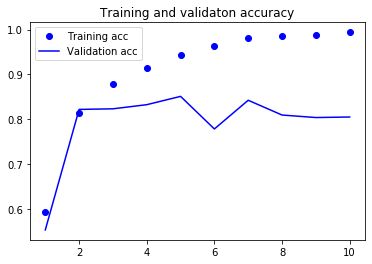

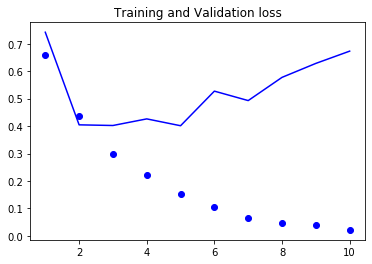

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validaton accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')

plt.show()

If you ever try to do a naive approach to this dataset, it will give you a better accuracy than the current scenario.
- This happens because this small recurrent network doesn't perform well compared to this baseline(only 80% validation accuracy).
- The problem is our inputs consider the first 500 words, rather than full sequences- hence RNN has access to less information that the baseline.

- **SimpleRNN** isn't good at processing long sequences, such as text